In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

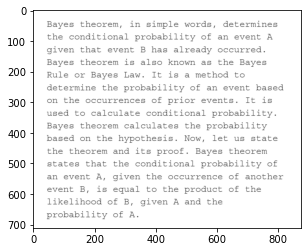

In [14]:
# inputImage = cv2.imread("./datasets/Testing Dataset/Documents/1.png")
# inputImage = cv2.imread("./datasets/Testing Dataset/PageSegData/PageImg/1.JPG")
inputImage = cv2.imread("./Test/Test2.png")
plt.imshow(inputImage)

# BINARIZE

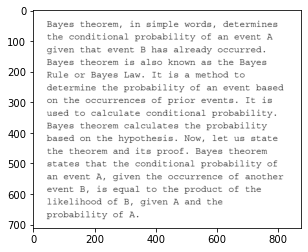

In [15]:
# Read input image:
inputCopy = inputImage.copy()

# Convert BGR to grayscale:
grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscaleImage, cmap='gray')

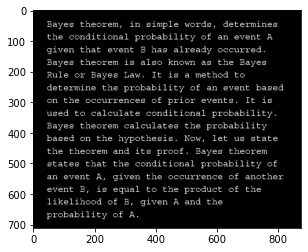

In [16]:
threshold, binImage = cv2.threshold(grayscaleImage ,0 ,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(binImage, cmap='gray')

# HORIZONTAL HISTOGRAM

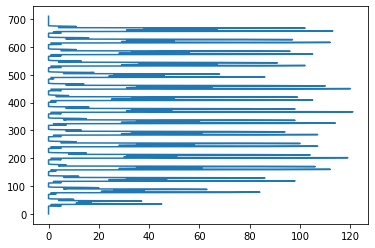

In [17]:
hist = cv2.reduce(binImage,1, cv2.REDUCE_AVG).reshape(-1)
plt.plot(hist[::-1],[x for x in range(len(hist))])

# LINES FORMULATION

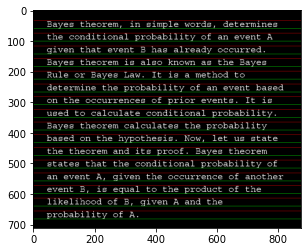

In [18]:
th = 0
H,W = binImage.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

linesImage = cv2.cvtColor(binImage, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(linesImage, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(linesImage, (0,y), (W, y), (0,255,0), 1)

plt.imshow(linesImage)

In [19]:
linesNormalized = []
for i in range(len(uppers)):
    croppedImg = binImage[uppers[i]:uppers[i] + lowers[i]-uppers[i], 0:0 + W]
    h = croppedImg.shape[0]
    dimension = (int(W*(28/float(h))), 28)
    resized = cv2.resize(croppedImg, dimension)
    linesNormalized.append(resized)


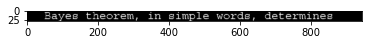

In [20]:
line = linesNormalized[0]
plt.imshow(line, cmap='gray')

# CHARACTER SEGMENTATION

In [21]:
def getCharacter(ch):
    # ch = np.ndarray.flatten(character)
#     print(character.shape)
    
    ch = 255 - ch  
#     cv2.imwrite('./one.png', character)
#     plt.imshow(character, cmap='gray')
    prediction = np.argmax(ocrmodel.predict(ch[np.newaxis, :]), axis=1)[0]
    if(prediction < 10): 
        return str(prediction)
    elif (prediction < 36):
        return chr(ord('A') + (prediction-10))
    return chr(ord('a') + (prediction-36))
#     return prediction

In [22]:
vth = 15
wth = 15
sentence = ""
for l in linesNormalized:
    sentence += '\n'
    vhist = cv2.reduce(l,0, cv2.REDUCE_AVG).reshape(-1)
    Hline,Wline = l.shape[:2]
    lefts = [x for x in range(Wline-1) if vhist[x]<=vth and vhist[x+1]>vth]
    rights = [x for x in range(Wline-1) if vhist[x]>vth and vhist[x+1]<=vth]
    # plt.matshow(l)


    for i in range(len(lefts)):
        character = l[0:0 + 28, lefts[i]:lefts[i]+ rights[i]-lefts[i]]
#     character = cv2.resize(character, (20,20))

        coords = cv2.findNonZero(character) # Find all non-zero points (text)
        x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
        character = character[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    # h = character.shape[0]
    # nH = 20
    # nW = nH * character.shape[1] / h
    # character = cv2.resize(character, (nW, nH))

        newWidth = 28
        curWidth = character.shape[1]
        if(newWidth < curWidth):
            character = cv2.resize(character, (28,28))
        else:
            diff = newWidth - curWidth
            left = int(diff/2)
            right = diff - left
            character = cv2.copyMakeBorder(character, 0,0,left,right,cv2.BORDER_CONSTANT,value=[0,0,0])


        newheight = 28
        curheight = character.shape[0]
        if(newheight < curheight):
            character = cv2.resize(character, (28,28))
        else:
            diff = newheight - curheight
            left = int(diff/2)
            right = diff - left
            character = cv2.copyMakeBorder(character,left,right,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])

    # print(cv2.imwrite('./datasets/'+str(i+1)+'.jpg', character))
        t = character
        ch = getCharacter(character)
        # print(ch)
    # plt.matshow(character, cmap='gray')
    # plt.title(ch)
    # print(ch)
        if(i != 0 and lefts[i] - rights[i-1] > wth):
            sentence += " "
        sentence += ch
    # else:
        # sentence += ' '
# sentence = sentence.replace('\n',r'\n')
print(sentence)

    # vlinesImage = cv2.cvtColor(line, cv2.COLOR_GRAY2BGR)
    # for x in lefts:
    #     cv2.line(vlinesImage, (x,0), (x, Hline), (255,0,0), 2)

    # for x in rights:
    #     cv2.line(vlinesImage, (x,0), (x, Hline), (0,255,0), 2)

# plt.imshow(vlinesImage)


BaYee theoremN in Simple wDraSN aeterwinee
the CDnaitiona1 prCbabilitY Cf an eVent A
SiYen that eYent B haS alreaay CCCurreaS
BaYee theorem iS alSC knDwn aS the BayeS
Rule Dr BaYee LawY zt iS a methCa to
aetermine the prDbability Df an eYent baSea
Dn the CCCurrenCee of priCr eYenteS It iS
ueea to CalCulate ConaitiCnal prDbabilityY
BaYee theorem CalCulateS the prCbabilitY
baSea on the hypDtheeieS NDwN let ue State
the theCrem ana itS proCfY BayeS theCrem
StateS that the ConaitiCnal probability Df
an eYent AN SiVen the oCCurrenCe Cf another
eVent BN iS equal to the proauCt Cf the
likelihCDa of BN SiVen A ana the
prCbabilitY Cf AS


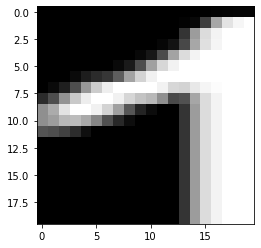

In [34]:
temp = line[0:0 + 20, lefts[0]:rights[0]]
temp = cv2.resize(temp, (20,20))
# newWidth = 28
# curWidth = temp.shape[1]
# if(newWidth < curWidth):
#     temp = cv2.resize(temp, (28,28))
# else:
#     diff = newWidth - curWidth
#     left = int(diff/2)
#     right = diff - left
#     temp = cv2.copyMakeBorder(temp, 0,0,left,right,cv2.BORDER_CONSTANT,value=[0,0,0])
plt.imshow(temp, cmap='gray')

In [11]:
from tensorflow.keras.models import load_model
ocrmodel = load_model('./models/character_recognition_update/')


In [55]:
wth = 15
sentence = ""
for i in range(len(lefts)):
    character = line[0:0 + 28, lefts[i]:lefts[i]+ rights[i]-lefts[i]]
#     character = cv2.resize(character, (20,20))

    coords = cv2.findNonZero(character) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    character = character[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    # h = character.shape[0]
    # nH = 20
    # nW = nH * character.shape[1] / h
    # character = cv2.resize(character, (nW, nH))

    newWidth = 28
    curWidth = character.shape[1]
    if(newWidth < curWidth):
        character = cv2.resize(character, (28,28))
    else:
        diff = newWidth - curWidth
        left = int(diff/2)
        right = diff - left
        character = cv2.copyMakeBorder(character, 0,0,left,right,cv2.BORDER_CONSTANT,value=[0,0,0])


    newheight = 28
    curheight = character.shape[0]
    if(newheight < curheight):
        character = cv2.resize(character, (28,28))
    else:
        diff = newheight - curheight
        left = int(diff/2)
        right = diff - left
        character = cv2.copyMakeBorder(character,left,right,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])

    # print(cv2.imwrite('./datasets/'+str(i+1)+'.jpg', character))
    t = character
    ch = getCharacter(character)
    # plt.matshow(character, cmap='gray')
    # plt.title(ch)
    # print(ch)
    if(i != 0 and lefts[i] - rights[i-1] > wth):
        sentence += " "
    sentence += ch
    # else:
        # sentence += ' '
sentence

'1X lntroduCtiOn'

In [38]:
for img in dilations:
    imgcopy = img.copy()
    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    contours_poly = [None] * len(contours)
    # The Bounding Rectangles will be stored here:
    boundRect = []

    # Alright, just look for the outer bounding boxes:
    for i, c in enumerate(contours):

        if hierarchy[0][i][3] == -1:
            contours_poly[i] = cv2.approxPolyDP(c, 3, True)
            boundRect.append(cv2.boundingRect(contours_poly[i]))


    # Draw the bounding boxes on the (copied) input image:
    for i in range(len(boundRect)):
        color = (0, 255, 0)
        cv2.rectangle(imgcopy, (int(boundRect[i][0]), int(boundRect[i][1])), \
                      (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] + boundRect[i][3])), color, 2)
    

NameError: name 'dilations' is not defined

In [ ]:
windowSize = 31
windowConstant = -1
# Apply the threshold:
# binaryImage = cv2.adaptiveThreshold(grayscaleImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, windowSize, windowConstant)
thresh,binaryImage = cv2.threshold(grayscaleImage ,0 ,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# componentsNumber, labeledImage, componentStats, componentCentroids = \
# cv2.connectedComponentsWithStats(binaryImage, connectivity=4)

# # Set the minimum pixels for the area filter:
# minArea = 20

# # Get the indices/labels of the remaining components based on the area stat
# # (skip the background component at index 0)
# remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

# # Filter the labeled pixels based on the remaining labels,
# # assign pixel intensity to 255 (uint8) for the remaining pixels
# filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

kernelSize = 7

# Set operation iterations:
opIterations = 1

# Get the structuring element:
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))

dilation = cv2.dilate(binaryImage,maxKernel,iterations = 1)

# Perform closing:
closingImage = cv2.morphologyEx(binaryImage, cv2.MORPH_CLOSE, maxKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

In [ ]:
# plt.imshow(dilation, cmap='gray')

In [ ]:
plt.imshow(closingImage, cmap='gray')

In [ ]:
contours, hierarchy = cv2.findContours(closingImage, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

contours_poly = [None] * len(contours)
# The Bounding Rectangles will be stored here:
boundRect = []

# Alright, just look for the outer bounding boxes:
for i, c in enumerate(contours):

    if hierarchy[0][i][3] == -1:
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect.append(cv2.boundingRect(contours_poly[i]))


# Draw the bounding boxes on the (copied) input image:
for i in range(len(boundRect)):
    color = (0, 255, 0)
    cv2.rectangle(inputCopy, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] + boundRect[i][3])), color, 2)

plt.imshow(inputCopy)
# cv2.imwrite("C:/Users/PRATEEK SINGH/Desktop/MLTwst/text-detection-and-translation-master/text-detection-and-translation-master/temp/b.png",inputCopy)


In [ ]:
list = []
print(len(boundRect))
num=0
for i in range(len(boundRect)):
    # Get the roi for each bounding rectangle:
    x, y, w, h = boundRect[i]

    # Crop the roi:
    croppedImg = inputImage[y:y + h, x:x + w]
    # plt.imshow(croppedImg)
    # cv2.imwrite(f"C:/Users/PRATEEK SINGH/Desktop/MLTwst/text-detection-and-translation-master/text-detection-and-translation-master/temp/img{num}.png",croppedImg)
    # print(num)
    # num+=1
    arr = np.array(croppedImg)
    list.append(arr)
    
    # cv2.imshow("Cropped Character: "+str(i), croppedImg)
    # cv2.waitKey(0)

list 